# Uma simulação para explicar o Teorema do Limite Central: mesmo quando uma amostra não é normalmente distribuída, se você extrair várias amostras e tomar cada uma de suas médias, essas médias representarão uma distribuição normal.

# EXEMPLO

Vamos supor uma base de clientes de uma loja virtual, que tenha um valor médio de pedido de R$170, então criaremos distribuições exponenciais com essa média. 

O Teorema do Limite Central sugere que, se você sortear aleatoriamente uma amostra de seus clientes, digamos 1.000 clientes, essa amostra em si pode não ser distribuída normalmente. Mas se você repetir o experimento 100 vezes, então as 100 médias dessas 100 amostras (de 1.000 clientes) formarão uma distribuição normal.

Primeiro eu desenho uma amostra de 1000 clientes. Em seguida, repita isso 4 vezes.

Cada uma dessas 4 médias plotadas.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def repeat_sample_draws_exponential(n, samp_size, mu, show_all=False):
    means = []

    samples = []
    for ii in range(0, n):
        samples.append(np.random.exponential(mu, samp_size))
        means.append(np.mean(samples[ii]))

    if show_all:
        pltdim = np.math.ceil(np.math.sqrt(n))
        fig, axs = plt.subplots(pltdim, pltdim, figsize=(8, 8), gridspec_kw={'hspace': 0.2}, sharex=True, sharey=True)
        fig.suptitle('Individual Samples\' Order Value Distribution')
        fig.text(0.5, 0.04, 'Order Values ($)', ha='center')
        fig.text(0.04, 0.5, 'Number of Customers', ha='center', rotation='vertical')
        axs = axs.flatten()
        for ii in range(0, n):

            plt.sca(axs[ii])

            plt.gca().hist(samples[ii], bins=int(50), histtype='step',
                           label='$mean = {0:.2f}$'.format(np.mean(samples[ii])), range=[0, 2 * mu])
            if n < 10:
                plt.gca().set_title('Sample #{0} : average={1:.2f}'.format(ii, np.mean(samples[ii])))
            for item in ([axs[ii].title, axs[ii].xaxis.label, axs[ii].yaxis.label] +
                             axs[ii].get_xticklabels() + axs[ii].get_yticklabels()):
                item.set_fontsize(8)
        
        plt.savefig('expdist_{0}_mu_{1}_sample_{2}_sampsize'.format(mu, n, samp_size))
        plt.show()

    plt.clf()
    plt.hist(means, bins=int(10), histtype='step')
    plt.title('Overall Average of {} Samples\' Average Order Value'.format(n))
    plt.xlabel('Average of Individual Sample\'s Order Value ($)')
    plt.savefig('average_of_expdist_{0}_mu_{1}_sample_{2}_sampsize'.format(mu, n, samp_size))
    print('mean of the samples is {0:.2f}'.format(np.mean(means)))
    print('standard deviation of the samples is {0:.2f}'.format(np.std(means)))
    plt.show()


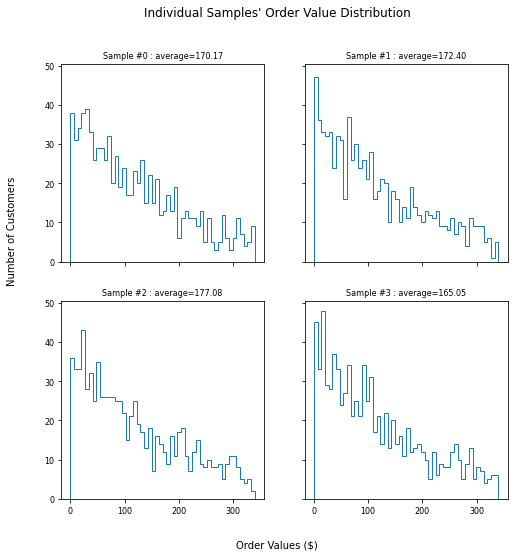

mean of the samples is 171.18
standard deviation of the samples is 4.33


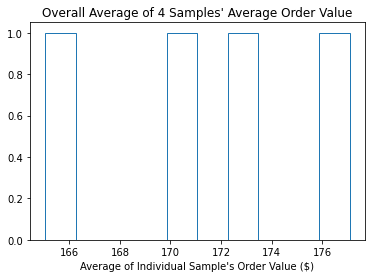

In [3]:
repeat_sample_draws_exponential(4, 1000, 170, True)

# O que acontece se repetirmos esse experimento 100 vezes? 

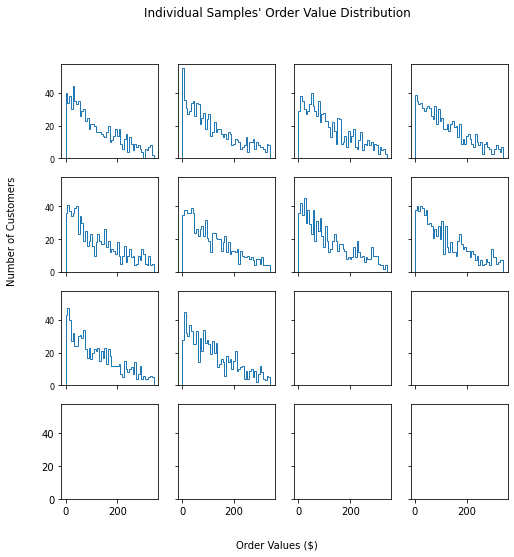

mean of the samples is 169.56
standard deviation of the samples is 4.11


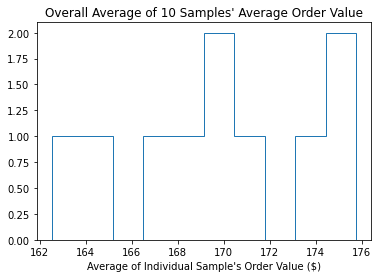

In [4]:
repeat_sample_draws_exponential(10, 1000, 170, True)

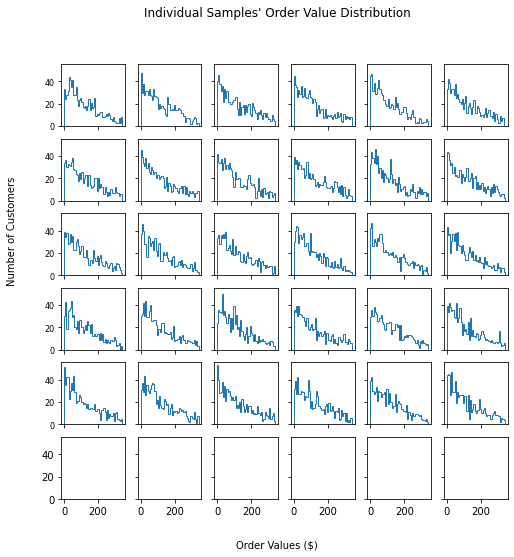

mean of the samples is 170.91
standard deviation of the samples is 5.66


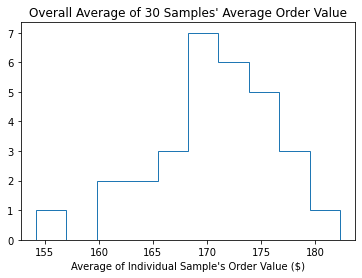

In [5]:
repeat_sample_draws_exponential(30, 1000, 170, True)

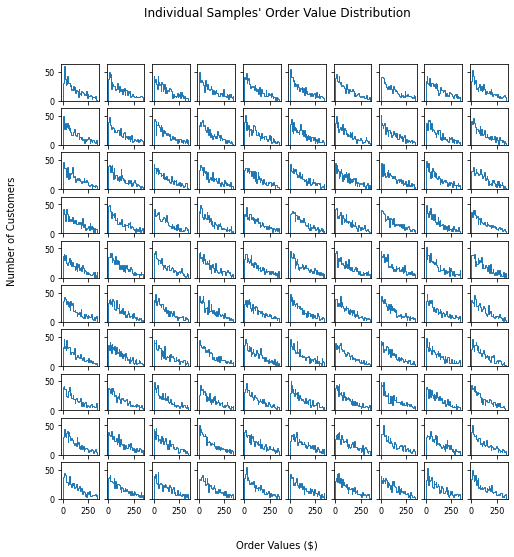

mean of the samples is 169.74
standard deviation of the samples is 5.35


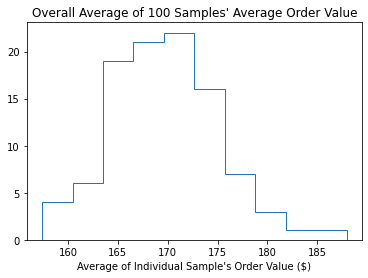

In [6]:
repeat_sample_draws_exponential(100, 1000, 170, True)

A distribuição das 100 médias agora começa a parecer uma distribuição normal

Então esse é o Teorema do Limite Central. Quanto mais amostras você extrai, melhor você consegue fazer a previsão correta da média populacional. Não podemos testar/pesquisar todos os nossos clientes (ou toda a nossa população), então a próxima melhor coisa que podemos fazer é extrair várias amostras de um número menor e obter a média dessas médias. A chave aqui é desenhar o maior número possível de amostras.